# DBSCAN - rice_ml
This notebook demonstrates how to use the DBSCAN class within the rice_ml package. It demonstrates it in an informative way that also analyzes the results, mirroring a standard use case of the classes.

Note: In practical applications, unsupervised models often require careful hyperparameter selection and evaluation using appropriate clustering or stability metrics. In some cases, multiple runs with different initializations may be necessary to assess robustness.

This notebook shows how to:
- Use 'KMeans' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Evaluate KMeans

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Model Training](#model-training)
- [Results](#results)

## Algorithm
K-means is a centroid-based, unsupervised learning algorithm used for clustering. The goal of the algorithm is to partition data into k clusters such that each data point belongs to the cluster with the nearest centroid. Unlike supervised algorithms, K-means does not use labeled data and instead discovers structure directly from the input features.

The algorithm begins by initializing k centroids, either randomly or using a heuristic. It then alternates between two steps: assigning each data point to the nearest centroid (based on Euclidean distance), and updating each centroid to be the mean of the points assigned to it. This process repeats until cluster assignments no longer change or a maximum number of iterations is reached.

![KNN Graph Example](../images/kmeans.png)
Source: [Bombay Softwares](https://www.bombaysoftwares.com/blog/introduction-to-k-means-clustering)

Because K-means relies on distance calculations, the scale of each feature directly affects the result. Features with larger magnitudes can dominate the distance computation, so normalization is typically applied before clustering.

For example, if clustering images or feature vectors, the algorithm groups data points based on similarity in feature space. Points that are close together are assigned to the same cluster, and the centroid represents the average location of the cluster in that space. 

### Pros vs Cons
#### Pros
- Simple and efficient
- Fast convergence on large datasets
- Easy to interpret cluster centers
- Works well when clusters are roughly spherical
#### Cons
- Requires choosing the number of clusters k
- Sensitive to feature scaling
- Sensitive to initialization
- Struggles with non-spherical or unevenly sized clusters

## Data Preparation
We will be using a synthetic clustering dataset generated with make_blobs. This dataset consists of 500 two-dimensional data points drawn from four distinct Gaussian clusters. Each cluster is centered around a different point in feature space, with a controlled amount of spread determined by the standard deviation.

Synthetic blob data is commonly used to demonstrate clustering algorithms because the underlying cluster structure is well-defined and easy to visualize. In this example, the true cluster labels are not used during training and are included only for reference.

X shape: (500, 2)
X Overall Summary:
Min: -10.105
Max: 12.096
Mean: -0.253
Std: 6.583
Before normalization:
Mean (first 5 features): [-3.39  2.89]
Std  (first 5 features): [5.24 6.29]
Min  (first 5 features): [-10.10545002  -8.64901784]
Max  (first 5 features): [ 7.10298348 12.09647132]


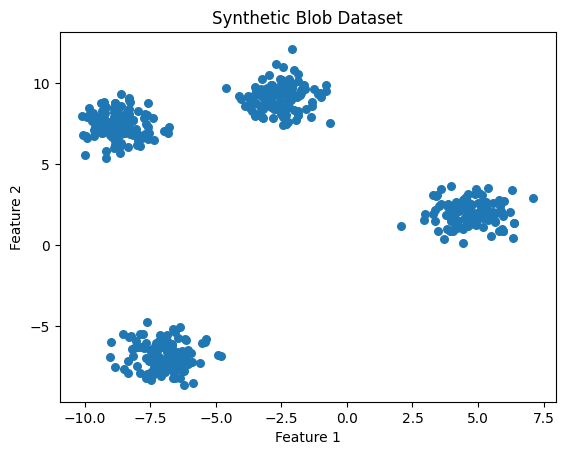

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.8, random_state=42)

X = np.asarray(X)

print("X shape:", X.shape)

print("X Overall Summary:")
print(f"Min: {X.min():.3f}")
print(f"Max: {X.max():.3f}")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

print("Before normalization:")
print("Mean (first 5 features):", np.round(X.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X.std(axis=0)[:5], 2))
print("Min  (first 5 features):", X.min(axis=0)[:5])
print("Max  (first 5 features):", X.max(axis=0)[:5])

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Synthetic Blob Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We can see four clear clusters. This is very clean data and the model should be able to cluster these four very easily. We will use k=4 in our model because of this clear separation.

## Model Training
Note that since this is unsupervised, there is no splitting of the data.

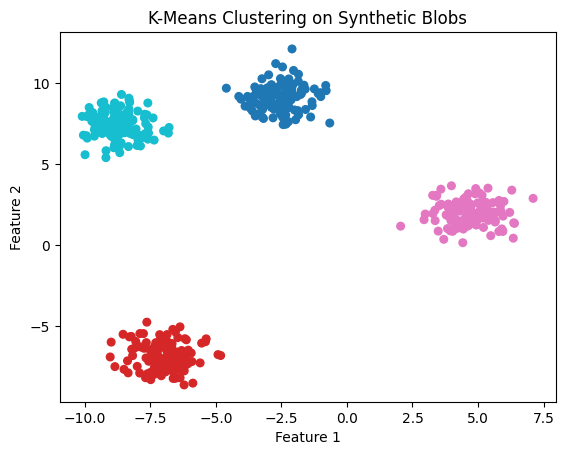

In [ ]:
from rice_ml.unsupervised_learning.k_means_clustering import KMeans
from rice_ml.utilities import confusion_matrix, plot_confusion_matrix, normalize

model = KMeans(
    n_clusters=4,
    max_iter=100,
    tol=1e-4,
    random_state=42
)

model.fit(X)

labels = model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="tab10", s=30)
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The clustering results show that K-means was able to clearly identify four distinct groups in the data. Each cluster is compact, well-separated, and roughly spherical in shape, which aligns well with the assumptions of the K-means algorithm.
Overall, the results demonstrate a strong clustering outcome: points within each cluster are close to one another, while clusters themselves are far apart. This makes the cluster assignments both visually intuitive and algorithmically sound.

We are going to apply a normalization as well and see what the outcome is.

#### Z-Score Normalization

After zscore normalization:
Mean (first 5 features): [-0. -0.]
Std  (first 5 features): [1. 1.]
Min  (first 5 features): [-1.28 -1.83]
Max  (first 5 features): [2.   1.47]


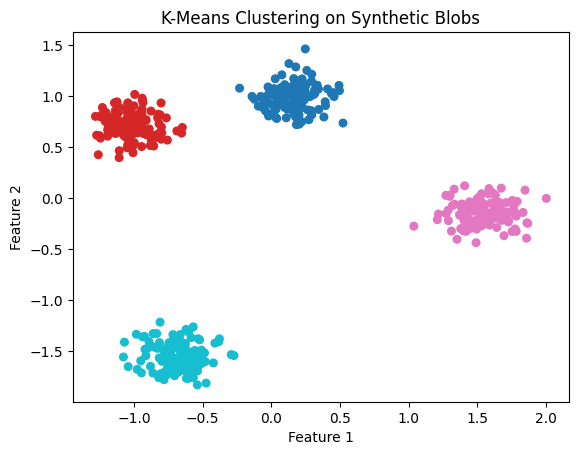

In [5]:
X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = KMeans(
    n_clusters=4,
    max_iter=100,
    tol=1e-4,
    random_state=42
)

model.fit(X_norm)

labels = model.predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap="tab10", s=30)
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

#### L2 Normalization

After zscore normalization:
Mean (first 5 features): [-0.02  0.02]
Std  (first 5 features): [0.04 0.04]
Min  (first 5 features): [-0.07 -0.06]
Max  (first 5 features): [0.05 0.08]


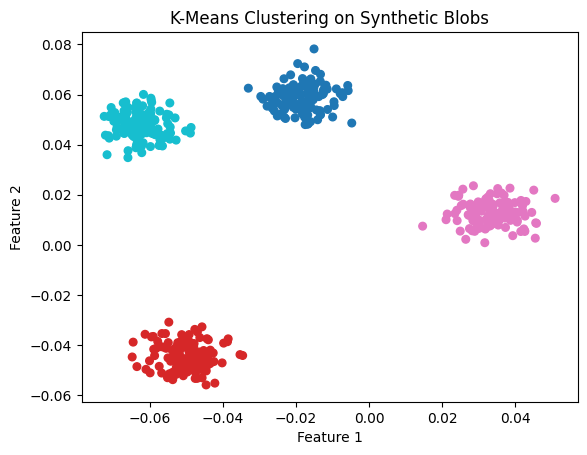

In [ ]:
X = np.asarray(X)
X_norm = normalize(X, method="l2")

print("After l2 normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = KMeans(
    n_clusters=4,
    max_iter=100,
    tol=1e-4,
    random_state=42
)

model.fit(X_norm)

labels = model.predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap="tab10", s=30)
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Results
Both normalizations produce the same results. The data is very clear and well separated, so it is no surprise all of them perform well.

A tricky part of this algorithm is choosing 'k' if you don't know how many clusters there should be. It is recommended to plot your data first and see if there is an apparent k, or look into the meaning of the data to see if you can find anything. Otherwise, tune 'k' as a parameter, using different scoring methods to decide.
Below is an example of using a bad 'k'. We can see the algorithm decides to clump the two closest clusters together, and it is clear it is incorrect.

After zscore normalization:
Mean (first 5 features): [-0. -0.]
Std  (first 5 features): [1. 1.]
Min  (first 5 features): [-1.28 -1.83]
Max  (first 5 features): [2.   1.47]


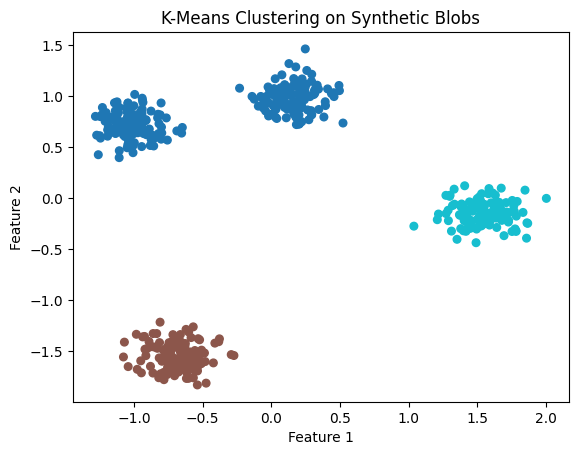

In [9]:
X = np.asarray(X)
X_norm = normalize(X, method="zscore")

print("After zscore normalization:")
print("Mean (first 5 features):", np.round(X_norm.mean(axis=0)[:5], 2))
print("Std  (first 5 features):", np.round(X_norm.std(axis=0)[:5], 2))
print("Min  (first 5 features):", np.round(X_norm.min(axis=0)[:5], 2))
print("Max  (first 5 features):", np.round(X_norm.max(axis=0)[:5], 2))

model = KMeans(
    n_clusters=3,
    max_iter=100,
    tol=1e-4,
    random_state=42
)

model.fit(X_norm)

labels = model.predict(X_norm)

plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels, cmap="tab10", s=30)
plt.title("K-Means Clustering on Synthetic Blobs")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Conclusion
Overall, we can see that k-means clustering works very well when data is well partitioned. When data is less regular, normalization is crucial, as well as hyperparemeter tuning.
We can also see the effect of having a bad 'k' parameter, as we see the assumptions the model begins to make.
This is an extremely efficient model and is a great choice when you do not know the labels of your data.